# intro

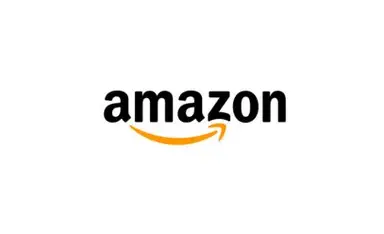

# Libraries Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [3]:
import os
import math
import re

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [5]:
from tensorflow.keras.layers import Input, Dense, LSTM, SimpleRNN , GRU, Bidirectional
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf

In [6]:
import pickle

def save_obj(obj, file_name):
    with open(file_name, 'wb') as f:
        pickle.dump(obj, f)        

def load_obj(file_name):
    with open(file_name, 'rb') as f:
        return pickle.load(f)

# Constants

In [7]:
WINDOW_SIZE = 35

# Dataset Import

In [8]:
df = pd.read_excel(r'prices.xlsx')

# Dataset Exploration

In [9]:
pd.concat([df.head(), df.tail()])

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900
851263,2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100


In [10]:
df.describe(include='all')

,date,symbol,open,close,low,high,volume
count,851264,851264,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
unique,NaN,501,NaN,NaN,NaN,NaN,NaN
top,NaN,AIV,NaN,NaN,NaN,NaN,NaN
freq,NaN,1762,NaN,NaN,NaN,NaN,NaN
mean,2013-07-21 02:56:29.294037760,NaN,70.836986,70.857109,70.118414,71.543476,5.415113e+06
min,2010-01-04 00:00:00,NaN,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,2011-10-19 00:00:00,NaN,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,2013-08-02 00:00:00,NaN,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,2015-04-24 00:00:00,NaN,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,2016-12-30 00:00:00,NaN,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    851264 non-null  datetime64[ns]
 1   symbol  851264 non-null  object        
 2   open    851264 non-null  float64       
 3   close   851264 non-null  float64       
 4   low     851264 non-null  float64       
 5   high    851264 non-null  float64       
 6   volume  851264 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 45.5+ MB


In [12]:
for key, val in df['symbol'].value_counts().items():
    print(key, val)

AIV 1762
ZION 1762
ZBH 1762
YUM 1762
AMGN 1762
AMG 1762
AME 1762
AMAT 1762
ALXN 1762
ALL 1762
ALK 1762
ALB 1762
AKAM 1762
AJG 1762
AIZ 1762
AIG 1762
AGN 1762
AFL 1762
AET 1762
AES 1762
AWK 1762
AVY 1762
AVGO 1762
AVB 1762
ATVI 1762
ARNC 1762
APH 1762
APD 1762
APC 1762
APA 1762
AON 1762
ANTM 1762
AN 1762
AMZN 1762
AMT 1762
AMP 1762
BLK 1762
BK 1762
BIIB 1762
BHI 1762
BEN 1762
BDX 1762
BCR 1762
BBY 1762
BBT 1762
BBBY 1762
BAX 1762
BAC 1762
BA 1762
AZO 1762
AYI 1762
AXP 1762
CELG 1762
CCL 1762
CCI 1762
CBS 1762
CBG 1762
CB 1762
CAT 1762
CAH 1762
CAG 1762
CA 1762
C 1762
BXP 1762
BWA 1762
BSX 1762
BMY 1762
BLL 1762
CNC 1762
CMS 1762
CMI 1762
CMG 1762
CME 1762
CMCSA 1762
CMA 1762
CLX 1762
CL 1762
CINF 1762
CI 1762
CHRW 1762
CHK 1762
CHD 1762
CF 1762
CERN 1762
CTXS 1762
CTSH 1762
CTL 1762
CTAS 1762
CSX 1762
CSCO 1762
CRM 1762
CPB 1762
COST 1762
COP 1762
COO 1762
COL 1762
COH 1762
COG 1762
COF 1762
CNP 1762
DLR 1762
DISCK 1762
DISCA 1762
DIS 1762
DHR 1762
DHI 1762
DGX 1762
DG 1762
DFS 1762
DE 

# Data Preprocessing

Types

In [13]:
pd.DataFrame([df.columns, df.dtypes])

,0,1,2,3,4,5,6
0,date,symbol,open,close,low,high,volume
1,datetime64[ns],object,float64,float64,float64,float64,int64


In [14]:
df.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [15]:
FEATURES_INPUT = ['date', 'symbol', 'open', 'close', 'low', 'high', 'volume']

FEATURE_TARGET = 'close'

FEATURES_INPUT_NUMERICAL = ['open', 'close', 'low', 'high', 'volume'] 

FEATURES_INPUT_CATEGORICAL = ['symbol']

FEATURES_INPUT_TIME = ['date']

In [16]:
df[FEATURES_INPUT_NUMERICAL] = df[FEATURES_INPUT_NUMERICAL].astype(float)
df[FEATURES_INPUT_CATEGORICAL] = df[FEATURES_INPUT_CATEGORICAL].astype(str)
df[FEATURE_TARGET] = df[FEATURE_TARGET].astype(float)

for time_feature in FEATURES_INPUT_TIME:
    df[time_feature] = pd.to_datetime(df[time_feature])


In [17]:
pd.DataFrame([df.columns, df.dtypes])

,0,1,2,3,4,5,6
0,date,symbol,open,close,low,high,volume
1,datetime64[ns],object,float64,float64,float64,float64,float64


Select amazon

In [18]:
SYMBOL_FEATURE = 'symbol'
df_amazon = df[ df[SYMBOL_FEATURE] == 'AMZN' ]

if SYMBOL_FEATURE in FEATURES_INPUT_CATEGORICAL:
    FEATURES_INPUT_CATEGORICAL.remove(SYMBOL_FEATURE)

if SYMBOL_FEATURE in FEATURES_INPUT:
    FEATURES_INPUT.remove(SYMBOL_FEATURE)

df_amazon.drop([SYMBOL_FEATURE], axis=1, inplace=True)

C:\Users\yosef\AppData\Local\Temp\ipykernel_13476\3868743322.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amazon.drop([SYMBOL_FEATURE], axis=1, inplace=True)


Sort by Time

In [19]:
df_amazon = df_amazon.sort_values(by=FEATURES_INPUT_TIME[0])
df_amazon.reset_index(inplace=True, drop=True)

Null Values

In [20]:
df_amazon.isna().sum()

date      0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

Dublicates

In [21]:
df_amazon.duplicated().sum()

np.int64(0)

# Data Visulaization

In [22]:
plt.style.use(plt.style.available[12])


Time trends

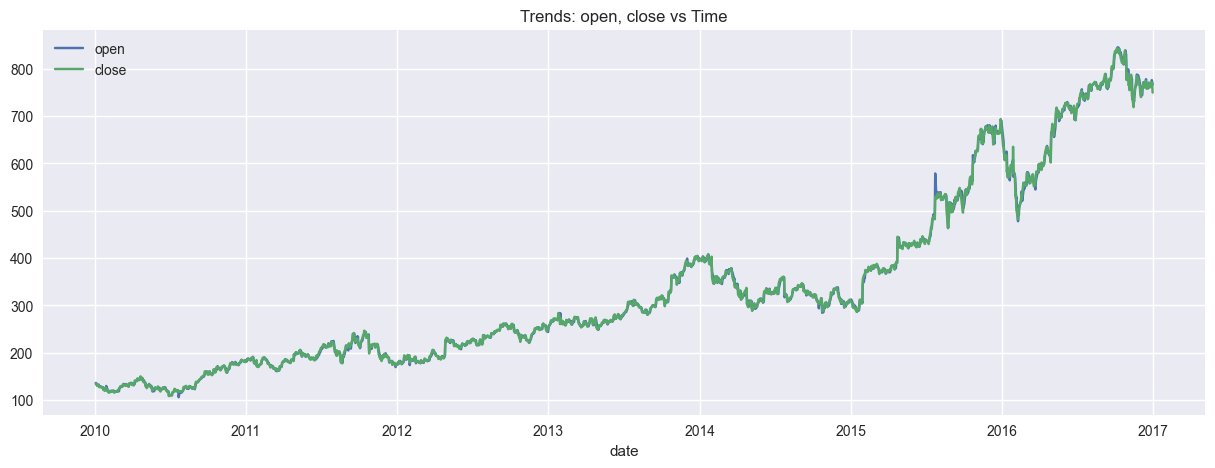

In [23]:
plt.figure(figsize=(15,5))
plt.title(f"Trends: {FEATURES_INPUT_NUMERICAL[0]}, {FEATURES_INPUT_NUMERICAL[1]} vs Time")
sns.lineplot(df_amazon, x=FEATURES_INPUT_TIME[0], y=FEATURES_INPUT_NUMERICAL[0], label=FEATURES_INPUT_NUMERICAL[0])
sns.lineplot(df_amazon, x=FEATURES_INPUT_TIME[0], y=FEATURES_INPUT_NUMERICAL[1], label=FEATURES_INPUT_NUMERICAL[1])
plt.legend()
plt.ylabel('')
plt.show()

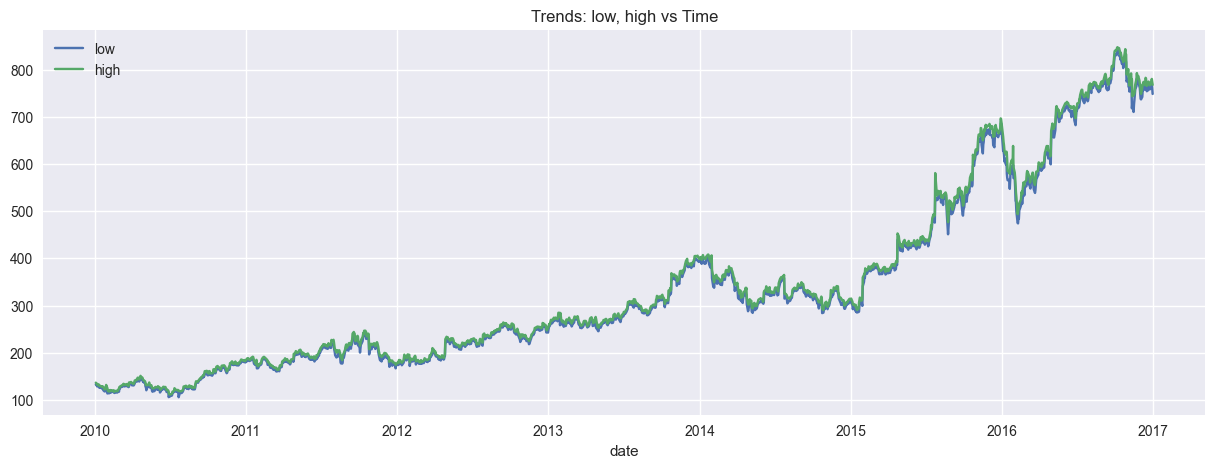

In [24]:
plt.figure(figsize=(15,5))
plt.title(f"Trends: {FEATURES_INPUT_NUMERICAL[2]}, {FEATURES_INPUT_NUMERICAL[3]} vs Time")
sns.lineplot(df_amazon, x=FEATURES_INPUT_TIME[0], y=FEATURES_INPUT_NUMERICAL[2], label=FEATURES_INPUT_NUMERICAL[2])
sns.lineplot(df_amazon, x=FEATURES_INPUT_TIME[0], y=FEATURES_INPUT_NUMERICAL[3], label=FEATURES_INPUT_NUMERICAL[3])
plt.legend()
plt.ylabel('')
plt.show()

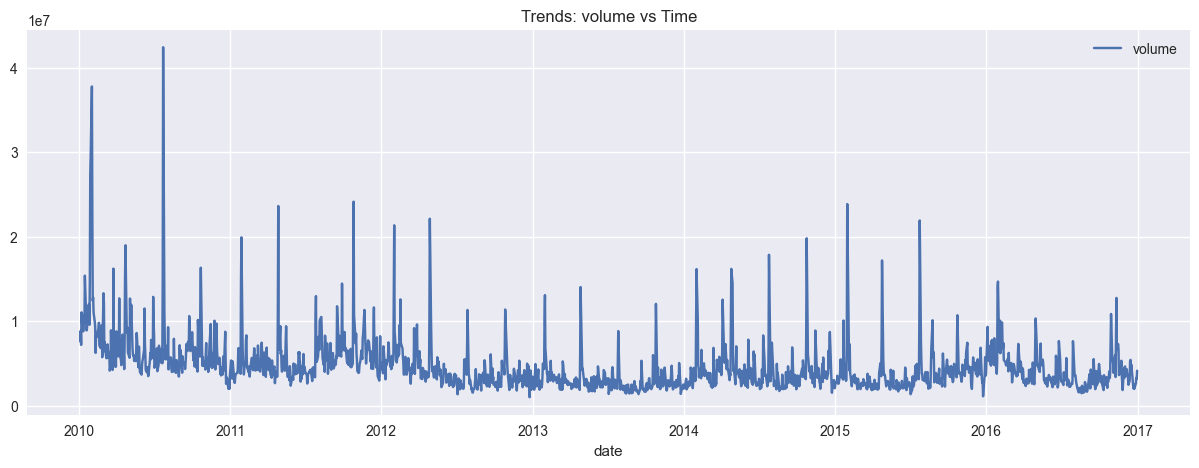

In [25]:
plt.figure(figsize=(15,5))
plt.title(f"Trends: {FEATURES_INPUT_NUMERICAL[4]} vs Time")
sns.lineplot(df_amazon, x=FEATURES_INPUT_TIME[0], y=FEATURES_INPUT_NUMERICAL[4], label=FEATURES_INPUT_NUMERICAL[4])
plt.legend()
plt.ylabel('')
plt.show()

# Outlier

In [26]:
def plot_box(features):
    ROW_WIDTH = 2
    temp = 0

    plt.figure(figsize=(20,10))

    for num_feature in features:
        plt.subplot( math.ceil(len(features)/ROW_WIDTH), ROW_WIDTH, temp + 1)
        sns.boxplot(df_amazon, x=num_feature, label= num_feature)
        temp = temp + 1
        plt.legend()

    plt.show()    

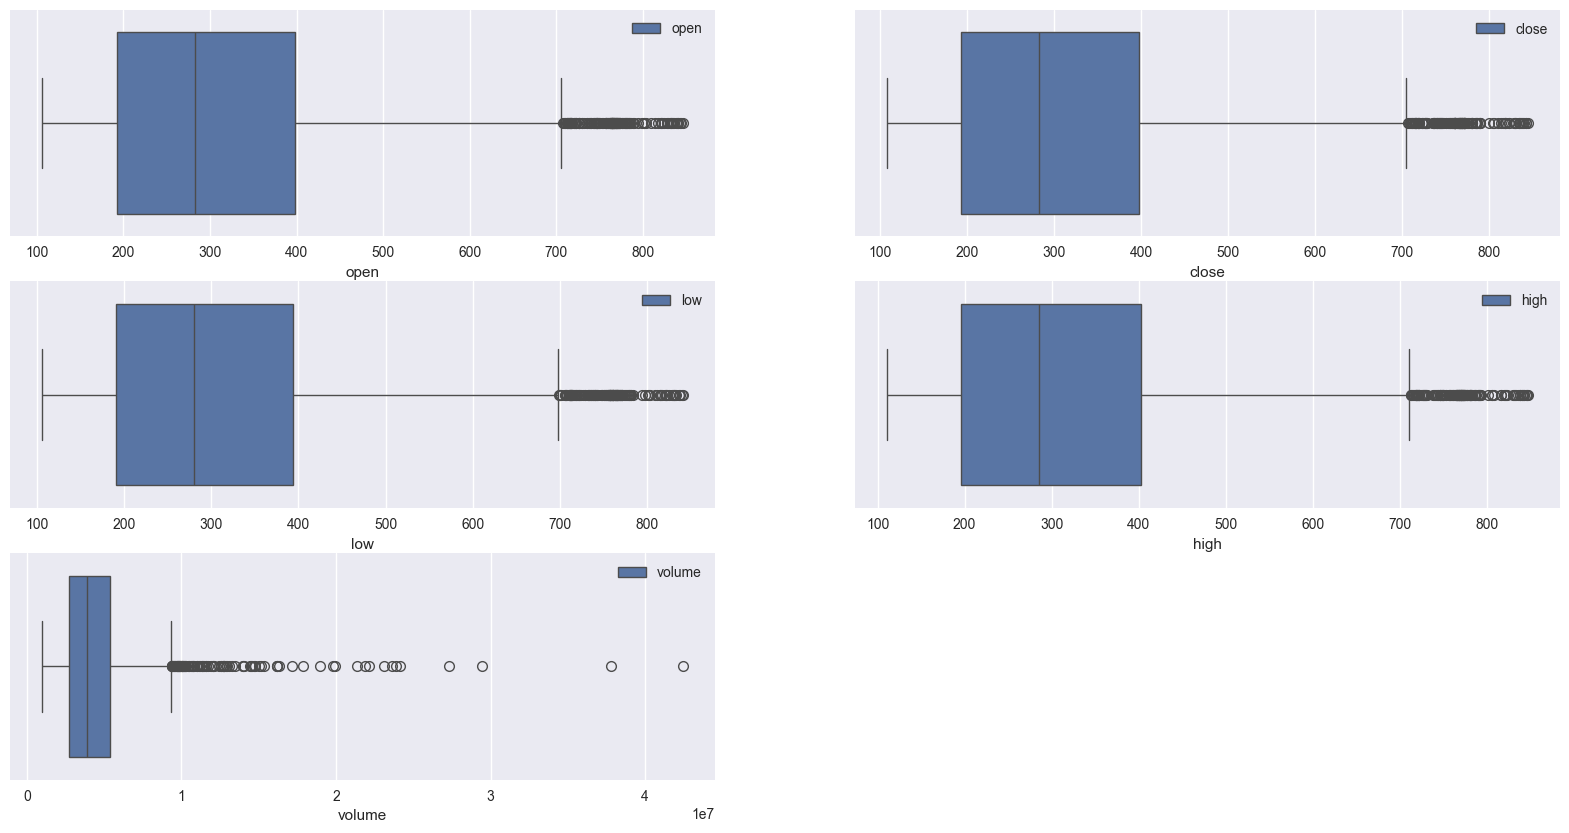

In [27]:
plot_box(FEATURES_INPUT_NUMERICAL)

In [28]:
def IQR(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    
    IQR = Q3 - Q1

    min_v = Q1 - 1.5 * IQR
    max_v = Q3 + 1.5 * IQR

    return series.clip(lower=min_v, upper=max_v)


In [29]:
# for num_feature in FEATURES_INPUT_NUMERICAL:
#     df_amazon.loc[:, num_feature] = IQR(df_amazon.loc[:,num_feature])

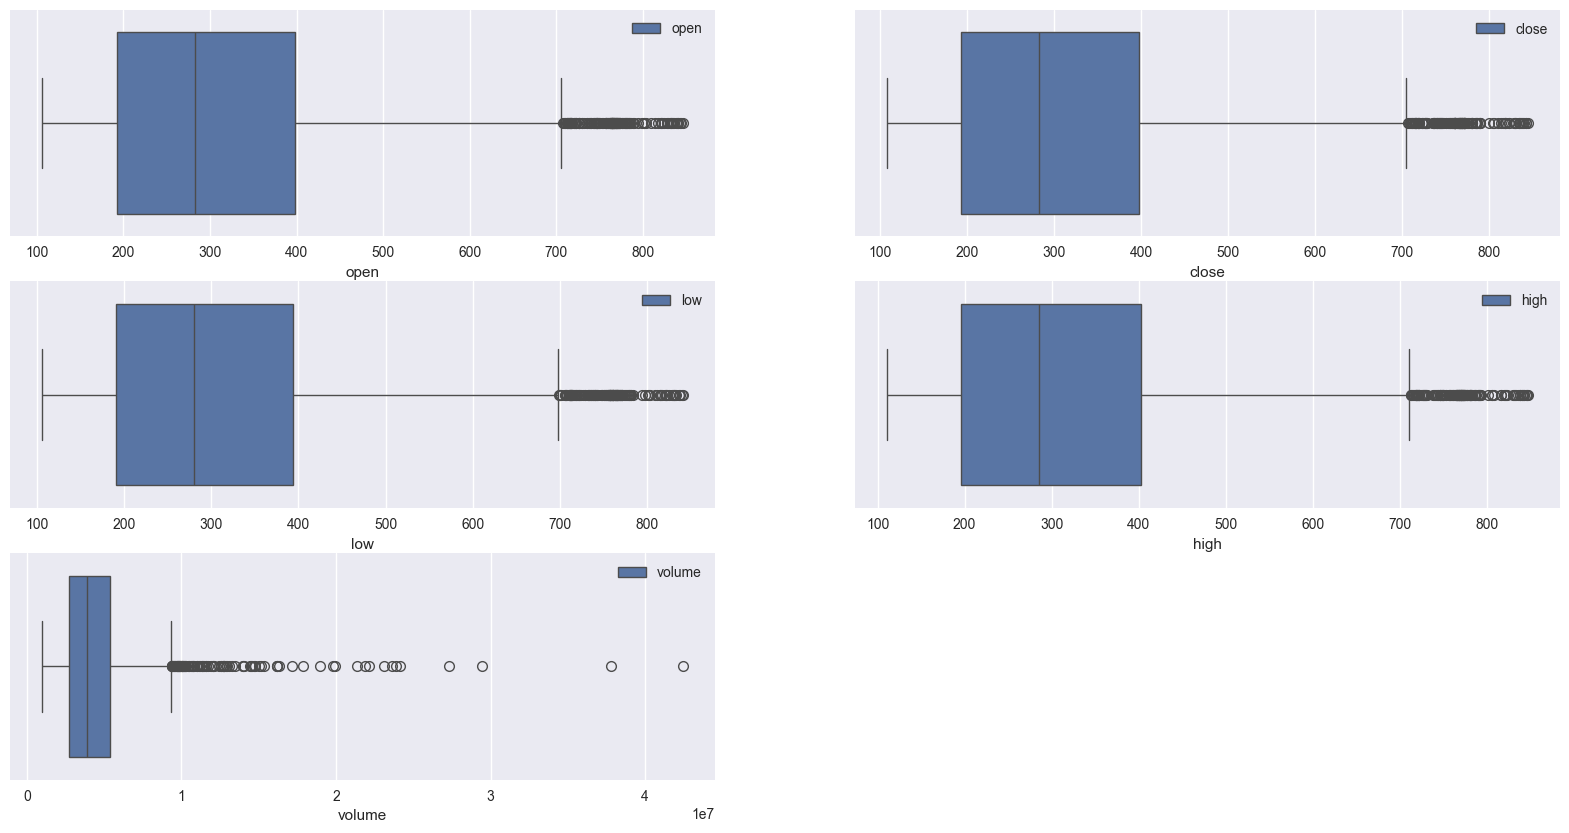

In [30]:
plot_box(FEATURES_INPUT_NUMERICAL)

# Feature Engineering

Feature Engineering Not Implemented here

# Correlation Matrix

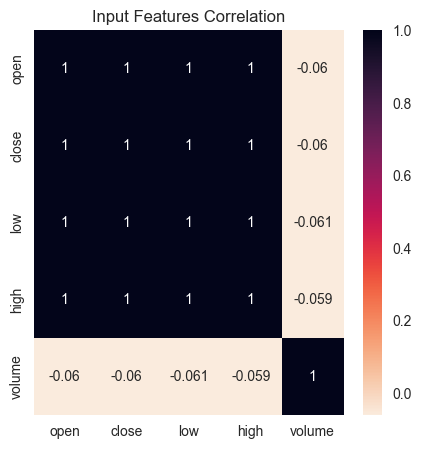

In [31]:
plt.figure(figsize=(5, 5)) 

plt.title("Input Features Correlation")

sns.heatmap( 
    df[FEATURES_INPUT_NUMERICAL].corr(),
    annot=True,
    cmap='rocket_r',
    )

plt.show()

In [32]:
# From above Matrix, we  will drop high correlated features and low correlated features

def drop_feature(feature):
    if feature in FEATURES_INPUT_CATEGORICAL:
        FEATURES_INPUT_CATEGORICAL.remove(feature)

    if feature in FEATURES_INPUT_NUMERICAL:
        FEATURES_INPUT_NUMERICAL.remove(feature)

    if feature in FEATURES_INPUT_TIME:
        FEATURES_INPUT_TIME.remove(feature)

    if feature in FEATURES_INPUT:
        FEATURES_INPUT.remove(feature)     

    if feature in df_amazon.columns:
        df_amazon.drop([feature], axis=1, inplace=True)

In [33]:
drop_feature('open')
drop_feature('low')
drop_feature('high')
drop_feature('volume')

In [34]:
df_amazon.columns

Index(['date', 'close'], dtype='object')

# Encoding & Scaling

In [35]:
trainable_df = df_amazon.copy()

In [36]:
trainable_df.drop(FEATURES_INPUT_TIME, axis=1, inplace=True);

In [37]:
FEATURES_INPUT_NUMERICAL

['close']

In [38]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(trainable_df[FEATURES_INPUT_NUMERICAL])

MinMaxScaler()

In [39]:
trainable_df.loc[:,FEATURES_INPUT_NUMERICAL] = min_max_scaler.transform(trainable_df[FEATURES_INPUT_NUMERICAL])

In [40]:
df_amazon.head()

,date,close
0,2010-01-04,133.899994
1,2010-01-05,134.690002
2,2010-01-06,132.250000
3,2010-01-07,130.000000
4,2010-01-08,133.520004


In [41]:
trainable_df.head()

,close
0,0.034373
1,0.035447
2,0.032130
3,0.029072
4,0.033857


# Train Dataset Splitting

Extract X & Y

In [42]:
X = []
y = []

for i in range(WINDOW_SIZE, len(trainable_df)):
    X.append(
        trainable_df.iloc[i - WINDOW_SIZE: i,[0]].values
    )
    y.append(
        trainable_df.iloc[i,0]
    )

X = np.array(X)
y = np.array(y)

In [43]:
X.shape, y.shape

((1727, 35, 1), (1727,))

In [71]:
X[1500]

array([[0.76390083],
       [0.7550527 ],
       [0.75555558],
       [0.75370715],
       [0.75445467],
       [0.75321779],
       [0.77008498],
       [0.79559631],
       [0.78893648],
       [0.7710228 ],
       [0.71815155],
       [0.71380223],
       [0.71225285],
       [0.67866804],
       [0.67745837],
       [0.69198777],
       [0.69219168],
       [0.64315325],
       [0.65836223],
       [0.62734625],
       [0.63319061],
       [0.62950734],
       [0.63392461],
       [0.66295619],
       [0.66316009],
       [0.66957528],
       [0.64524633],
       [0.71592251],
       [0.65020728],
       [0.63363915],
       [0.60277266],
       [0.57418962],
       [0.58124365],
       [0.53485561],
       [0.51578663]])

In [45]:
TEST_SIZE = 0.3
split_threshold = int( (1 - TEST_SIZE) * y.shape[0])

X_train = X[0:split_threshold, :]
X_test = X[split_threshold:, :]

y_train = y[0:split_threshold]
y_test = y[split_threshold:]

In [46]:
print(f"{X_train.shape= }")
print(f"{y_train.shape= }")
print(f"{X_test.shape= }")
print(f"{y_test.shape= }")

X_train.shape= (1208, 35, 1)
y_train.shape= (1208,)
X_test.shape= (519, 35, 1)
y_test.shape= (519,)


# Deep Model Class Defination

In [47]:
CACHE_MODELS_DIR_NAME = 'models_cache' 
os.makedirs(CACHE_MODELS_DIR_NAME, exist_ok=True)

In [48]:
class CustomModel:
    def __init__(self, name, model):
        self.name = str(name)
        self.model = model

        self.y_train_hat = None
        self.y_test_hat = None
        
        self.load()

    def fit(self, x_train, y_train, epochs, validation_split, force_train= False):

        file_name = re.sub('', '', str(self.name).lower())
        file_path = CACHE_MODELS_DIR_NAME + '/' + file_name + '.keras'

        es = EarlyStopping(
            monitor='val_loss',      
            patience=5,              
            verbose=1,              
            restore_best_weights=True   
        )
        
        mcp = ModelCheckpoint(
            filepath=file_path,    
            monitor='val_loss',           
            save_best_only=True,          
            save_weights_only=False,      
            mode='min',                  
            verbose=1   
        )

        if self.trained == False or force_train:
            self.model.fit(x_train, y_train, callbacks=[es, mcp], epochs =epochs, validation_split=validation_split)
            self.trained = True

            self.history = self.model.history
            file_history_path = CACHE_MODELS_DIR_NAME + '/' + file_name + '_history.pickle'
            save_obj(self.history ,file_history_path)
    
    def prdict_on_train(self, x_train):
        if self.y_train_hat is None:
            self.y_train_hat = self.model.predict(x_train)
    
    def prdict_on_test(self, x_test):
        if self.y_test_hat is None:
            self.y_test_hat = self.model.predict(x_test)

    def save(self):
        file_name = re.sub('', '', str(self.name).lower())
        file_path = CACHE_MODELS_DIR_NAME + '/' + file_name + '.keras'
        self.model.save(file_path)       

    def load(self):
        file_name = re.sub('', '', str(self.name).lower())
        file_path = CACHE_MODELS_DIR_NAME + '/' + file_name + '.keras'

        if os.path.exists(file_path):
            self.model = load_model(file_path)
            self.trained = True
            print(F'Model {self.name} loaded from cache')
        else:
            self.trained = False

        file_history_path = CACHE_MODELS_DIR_NAME + '/' + file_name + '_history.pickle'
        if os.path.exists(file_history_path):
            self.history = load_obj(file_history_path)

            self.model.history = self.history

# Deep Classes

In [49]:
models_list = []

In [50]:
def build_model_1(): 
    NAME = "shallow_rnn"

    input_layer = Input(shape= X_train.shape[1:])

    rnn_layer_1 = SimpleRNN(units = 16)
    rnn_layer_out = rnn_layer_1(input_layer)

    dense_layer_1 = Dense(1, activation='linear')
    dense_layer_out = dense_layer_1(rnn_layer_out)

    model = Model(
        input_layer, dense_layer_out,
        name = NAME
    )

    model.compile(optimizer='adam', loss='mse')

    return CustomModel(NAME, model)


models_list.append(build_model_1())
models_list[-1].model.summary()

Model shallow_rnn loaded from cache


Model: "shallow_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 35, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 16)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 917 (3.59 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 612 (2.39 KB)

In [51]:
def build_model_2(): 
    NAME = "deep_rnn"

    input_layer = Input(shape= X_train.shape[1:])

    rnn_layer_1 = SimpleRNN(units = 16, return_sequences=True)
    rnn_layer_out = rnn_layer_1(input_layer)

    rnn_layer_2 = SimpleRNN(units = 16)
    rnn_layer_out_2 = rnn_layer_2(rnn_layer_out)

    dense_layer_1 = Dense(1, activation='linear')
    dense_layer_out = dense_layer_1(rnn_layer_out_2)

    model = Model(
        input_layer, dense_layer_out,
        name = NAME
    )

    model.compile(optimizer='adam', loss='mse')

    return CustomModel(NAME, model)


models_list.append(build_model_2())
models_list[-1].model.summary()

Model deep_rnn loaded from cache


Model: "deep_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 35, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 35, 16)         │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,501 (9.77 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,668 (6.52 KB)

In [52]:
def build_model_3(): 
    NAME = "shallow_gru"

    input_layer = Input(shape= X_train.shape[1:])

    rnn_layer_1 = GRU(units = 16)
    rnn_layer_out = rnn_layer_1(input_layer)

    dense_layer_1 = Dense(1, activation='linear')
    dense_layer_out = dense_layer_1(rnn_layer_out)

    model = Model(
        input_layer, dense_layer_out,
        name = NAME
    )

    model.compile(optimizer='adam', loss='mse')

    return CustomModel(NAME, model)


models_list.append(build_model_3())
models_list[-1].model.summary()

Model shallow_gru loaded from cache


Model: "shallow_gru"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 35, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 16)             │           912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,789 (10.90 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,860 (7.27 KB)

In [53]:
def build_model_4(): 
    NAME = "deep_gru"

    input_layer = Input(shape= X_train.shape[1:])

    rnn_layer_1 = GRU(units = 16, return_sequences=True)
    rnn_layer_out = rnn_layer_1(input_layer)

    rnn_layer_2 = GRU(units = 16)
    rnn_layer_out_2 = rnn_layer_2(rnn_layer_out)

    dense_layer_1 = Dense(1, activation='linear')
    dense_layer_out = dense_layer_1(rnn_layer_out_2)

    model = Model(
        input_layer, dense_layer_out,
        name = NAME
    )

    model.compile(optimizer='adam', loss='mse')

    return CustomModel(NAME, model)


models_list.append(build_model_4())
models_list[-1].model.summary()

Model deep_gru loaded from cache


Model: "deep_gru"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 35, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 35, 16)         │           912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,685 (30.02 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,124 (20.02 KB)

In [54]:
def build_model_5(): 
    NAME = "shallow_lstm"

    input_layer = Input(shape= X_train.shape[1:])

    rnn_layer_1 = LSTM(units = 16)
    rnn_layer_out = rnn_layer_1(input_layer)

    dense_layer_1 = Dense(1, activation='linear')
    dense_layer_out = dense_layer_1(rnn_layer_out)

    model = Model(
        input_layer, dense_layer_out,
        name = NAME
    )

    model.compile(optimizer='adam', loss='mse')

    return CustomModel(NAME, model)


models_list.append(build_model_5())
models_list[-1].model.summary()

Model shallow_lstm loaded from cache


Model: "shallow_lstm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 35, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 16)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,509 (13.71 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,340 (9.14 KB)

In [55]:
def build_model_6(): 
    NAME = "deep_lstm"

    input_layer = Input(shape= X_train.shape[1:])

    rnn_layer_1 = LSTM(units = 16, return_sequences=True)
    rnn_layer_out = rnn_layer_1(input_layer)

    rnn_layer_2 = LSTM(units = 16)
    rnn_layer_out_2 = rnn_layer_2(rnn_layer_out)

    dense_layer_1 = Dense(1, activation='linear')
    dense_layer_out = dense_layer_1(rnn_layer_out_2)

    model = Model(
        input_layer, dense_layer_out,
        name = NAME
    )

    model.compile(optimizer='adam', loss='mse')

    return CustomModel(NAME, model)


models_list.append(build_model_6())
models_list[-1].model.summary()

Model deep_lstm loaded from cache


Model: "deep_lstm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 35, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 35, 16)         │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 16)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,845 (38.46 KB)

 Trainable params: 3,281 (12.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,564 (25.64 KB)

# Model Training

In [56]:
for i, model in enumerate(models_list):
    print(f"{i+1}. Train: {model.name}")
    model.fit(X_train,y_train, epochs =100, validation_split=0.1, force_train=False)
    print('\n')

1. Train: shallow_rnn


2. Train: deep_rnn


3. Train: shallow_gru


4. Train: deep_gru


5. Train: shallow_lstm


6. Train: deep_lstm




history

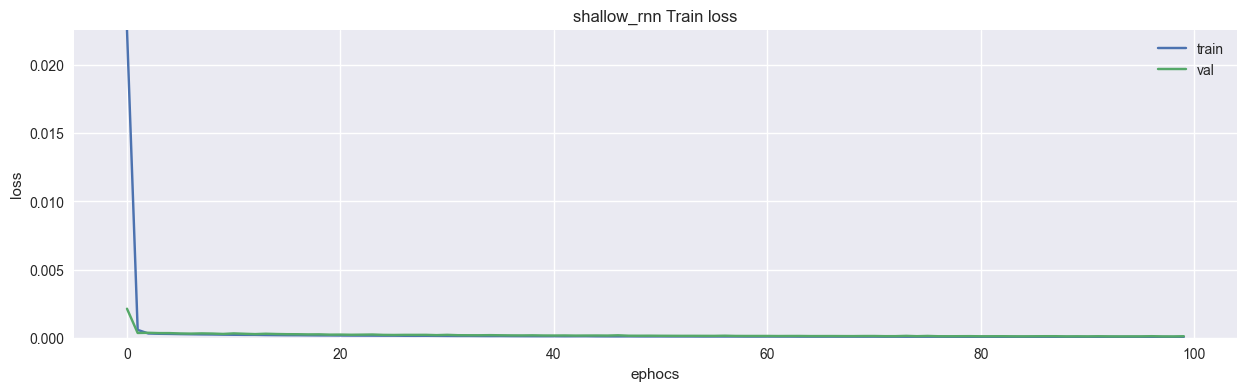

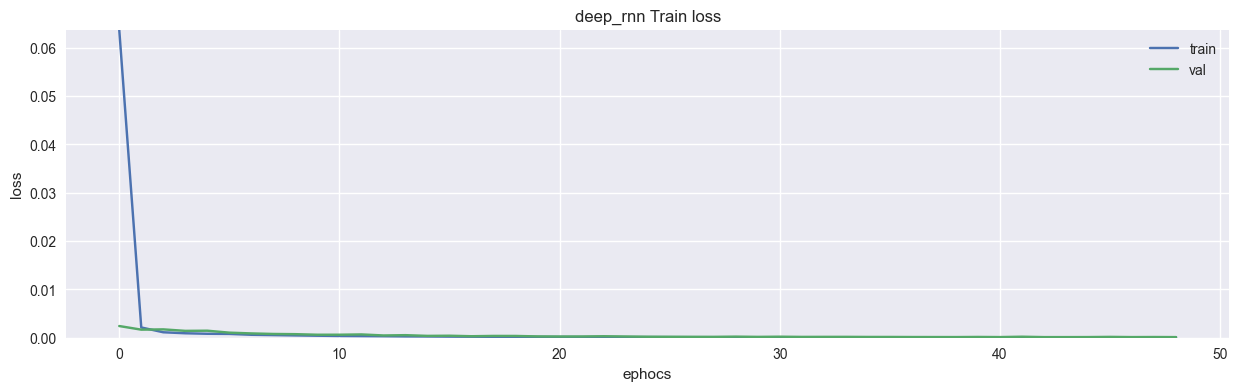

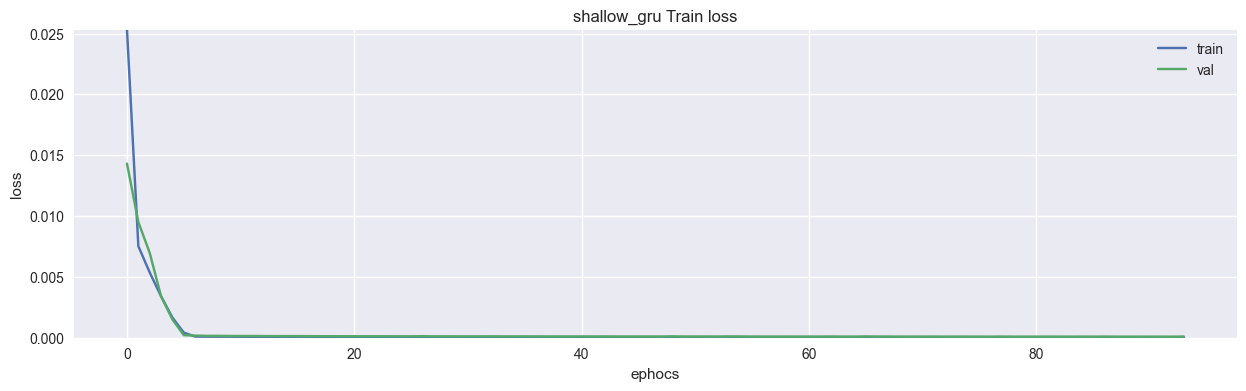

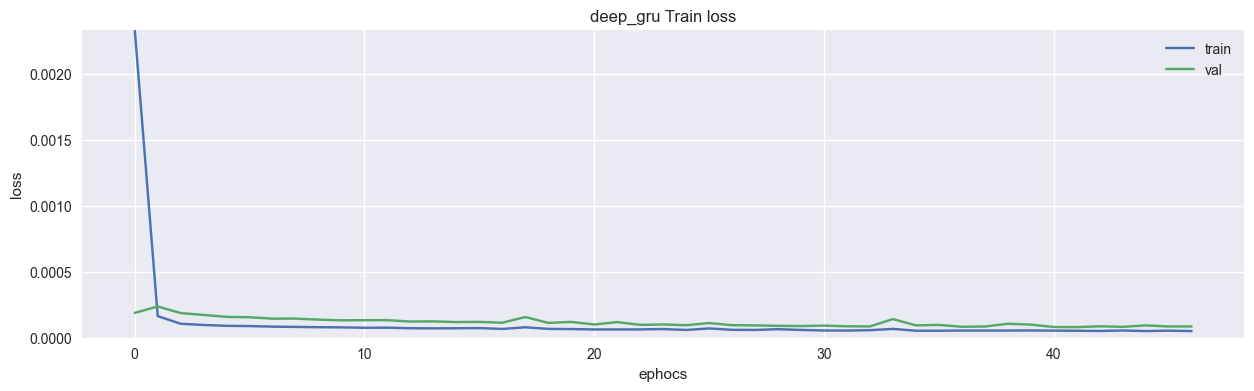

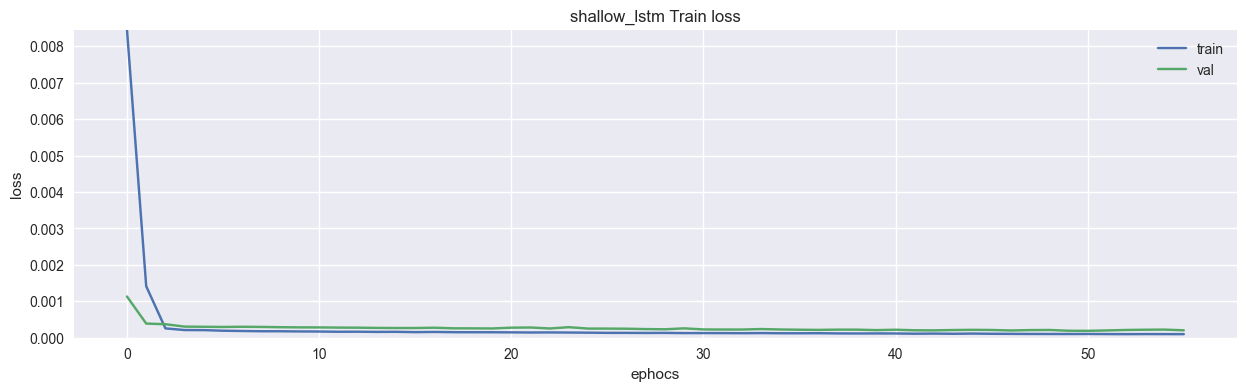

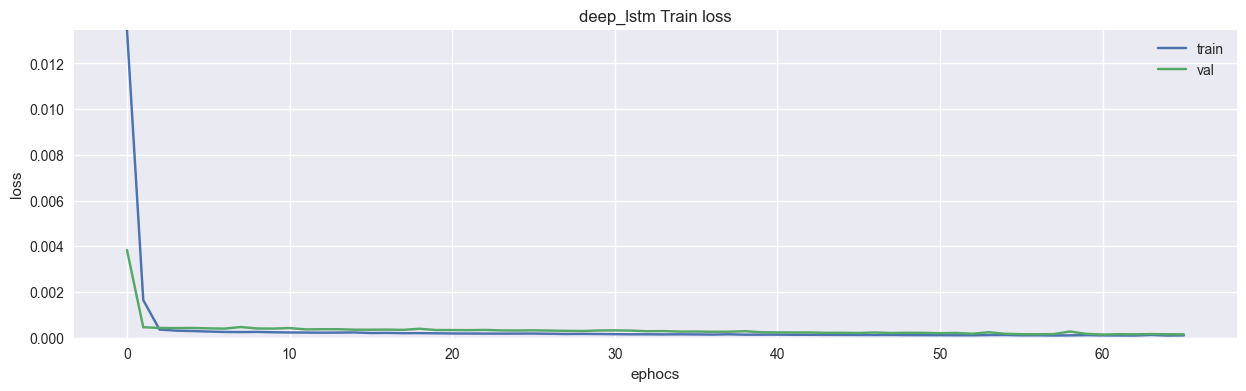

In [57]:
for i, model in enumerate(models_list):
    plt.figure(figsize=(15,4))

    plt.title(f"{model.name} Train loss")
    plt.ylabel('loss')
    plt.xlabel('ephocs')
    plt.plot(model.history.history['loss'], label='train')
    plt.plot(model.history.history['val_loss'], label='val')
    plt.ylim(0, max(max(model.history.history['val_loss']) , max(model.history.history['loss'])) )
    plt.legend()
    plt.show()

# Model Evaluation

In [58]:
for i, model in enumerate(models_list):
    print(f'{i+1:3d}/{len(models_list)}. Predict {model.name} on train data')
    model.prdict_on_train(X_train)

  1/6. Predict shallow_rnn on train data
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
  2/6. Predict deep_rnn on train data
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
  3/6. Predict shallow_gru on train data
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
  4/6. Predict deep_gru on train data
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
  5/6. Predict shallow_lstm on train data
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
  6/6. Predict deep_lstm on train data
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [59]:
for i, model in enumerate(models_list):
    print(f'{i+1:3d}/{len(models_list)}. Predict {model.name} on test data')
    model.prdict_on_test(X_test)

  1/6. Predict shallow_rnn on test data
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  2/6. Predict deep_rnn on test data
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
  3/6. Predict shallow_gru on test data
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
  4/6. Predict deep_gru on test data
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
  5/6. Predict shallow_lstm on test data
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
  6/6. Predict deep_lstm on test data
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [60]:
evaluation_dataset = []

for i, model in enumerate(models_list):
    print(f'{i+1:02d}/{len(models_list)}. Evaluate {model.name}')

    mean_squared_error_train = mean_squared_error( y_train, model.y_train_hat )
    mean_squared_error_test = mean_squared_error( y_test, model.y_test_hat )

    mean_absolute_error_train = mean_absolute_error( y_train, model.y_train_hat )
    mean_absolute_error_test = mean_absolute_error( y_test, model.y_test_hat )


    evaluation_dataset.append({
        "model": model.name, 
        'mean_squared_error': mean_squared_error_train,
        'mean_absolute_error':mean_absolute_error_train,
        'data':'train'}
    )

    evaluation_dataset.append({
        "model": model.name,
        'mean_squared_error': mean_squared_error_test,
        'mean_absolute_error':mean_absolute_error_test,
        'data':'test'}
    )


    print(evaluation_dataset[-2])
    print(evaluation_dataset[-1])
    print('\n')


evaluation_dataset = pd.DataFrame(evaluation_dataset)

01/6. Evaluate shallow_rnn
{'model': 'shallow_rnn', 'mean_squared_error': 6.631179047741964e-05, 'mean_absolute_error': 0.006010422851028184, 'data': 'train'}
{'model': 'shallow_rnn', 'mean_squared_error': 0.003589500667526243, 'mean_absolute_error': 0.046921246812432905, 'data': 'test'}


02/6. Evaluate deep_rnn
{'model': 'deep_rnn', 'mean_squared_error': 9.028616557848325e-05, 'mean_absolute_error': 0.007233004969603121, 'data': 'train'}
{'model': 'deep_rnn', 'mean_squared_error': 0.09709611955993408, 'mean_absolute_error': 0.22224281722173592, 'data': 'test'}


03/6. Evaluate shallow_gru
{'model': 'shallow_gru', 'mean_squared_error': 5.2342365213759016e-05, 'mean_absolute_error': 0.005070177179426407, 'data': 'train'}
{'model': 'shallow_gru', 'mean_squared_error': 0.00151327875818057, 'mean_absolute_error': 0.03014997504245032, 'data': 'test'}


04/6. Evaluate deep_gru
{'model': 'deep_gru', 'mean_squared_error': 5.2134059360369125e-05, 'mean_absolute_error': 0.005034047521448652, 'd

In [61]:
evaluation_dataset.sort_values('mean_absolute_error', ascending=True)

,model,mean_squared_error,mean_absolute_error,data
6,deep_gru,0.000052,0.005034,train
4,shallow_gru,0.000052,0.005070,train
0,shallow_rnn,0.000066,0.006010,train
2,deep_rnn,0.000090,0.007233,train
10,deep_lstm,0.000098,0.007336,train
8,shallow_lstm,0.000107,0.007571,train
7,deep_gru,0.000718,0.020683,test
5,shallow_gru,0.001513,0.030150,test
9,shallow_lstm,0.002645,0.040984,test
11,deep_lstm,0.003359,0.045488,test


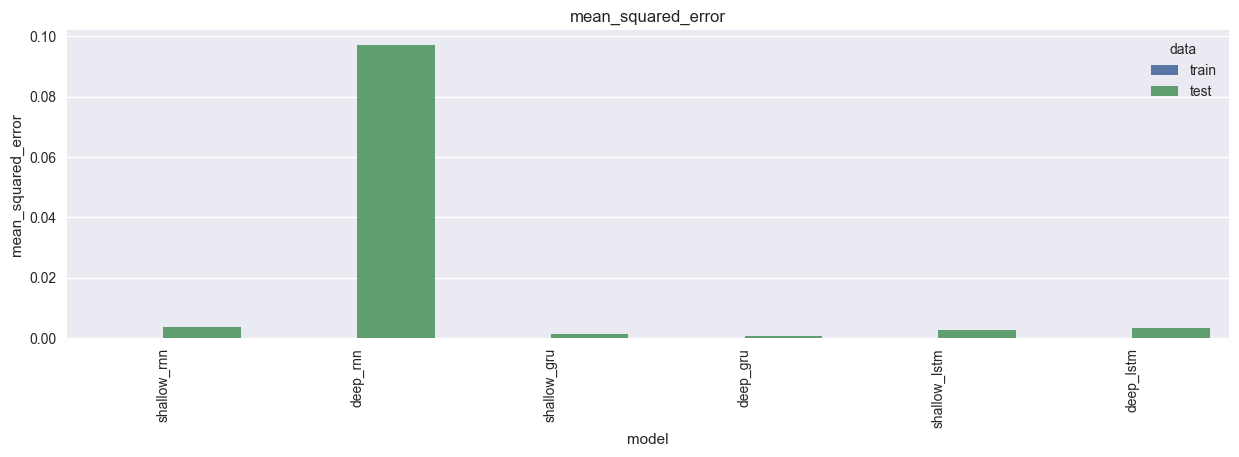

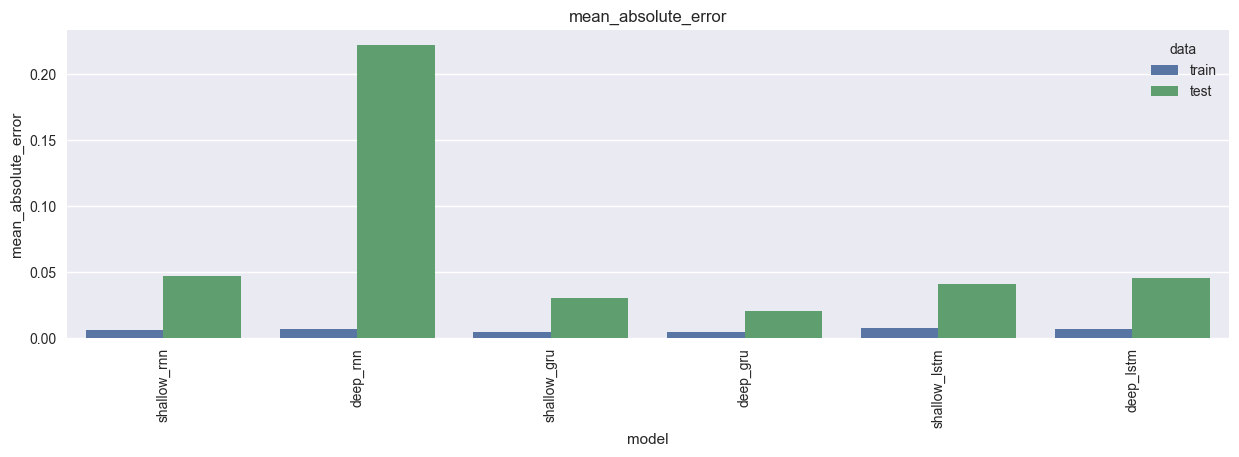

In [62]:
for metric in evaluation_dataset.columns: 
    if metric in ['model', 'data']:
        continue

    plt.figure(figsize=(15,4))
    plt.title(f"{metric}")
    sns.barplot(evaluation_dataset, x='model',y=metric, hue='data')
    plt.xticks(rotation = 90)
    plt.show()

Trends

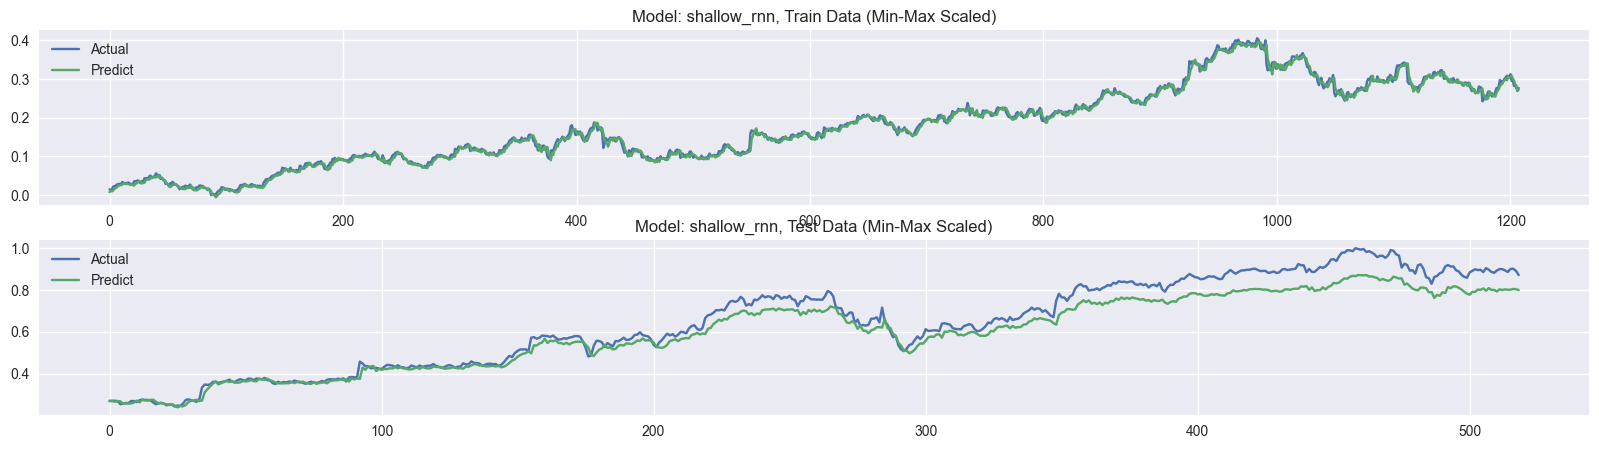

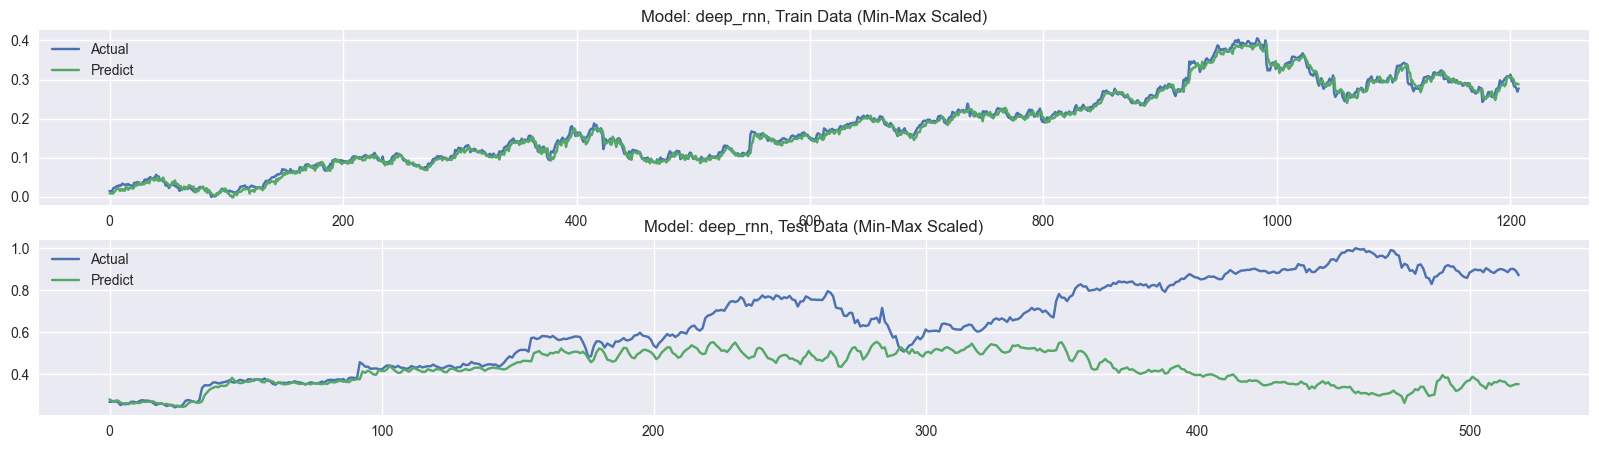

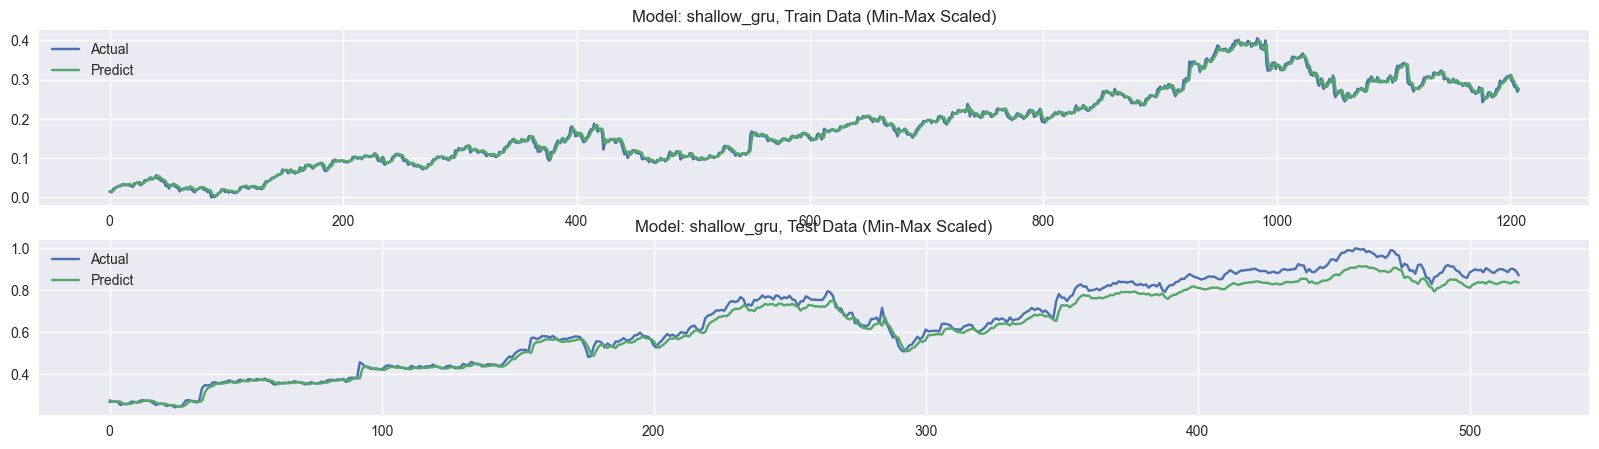

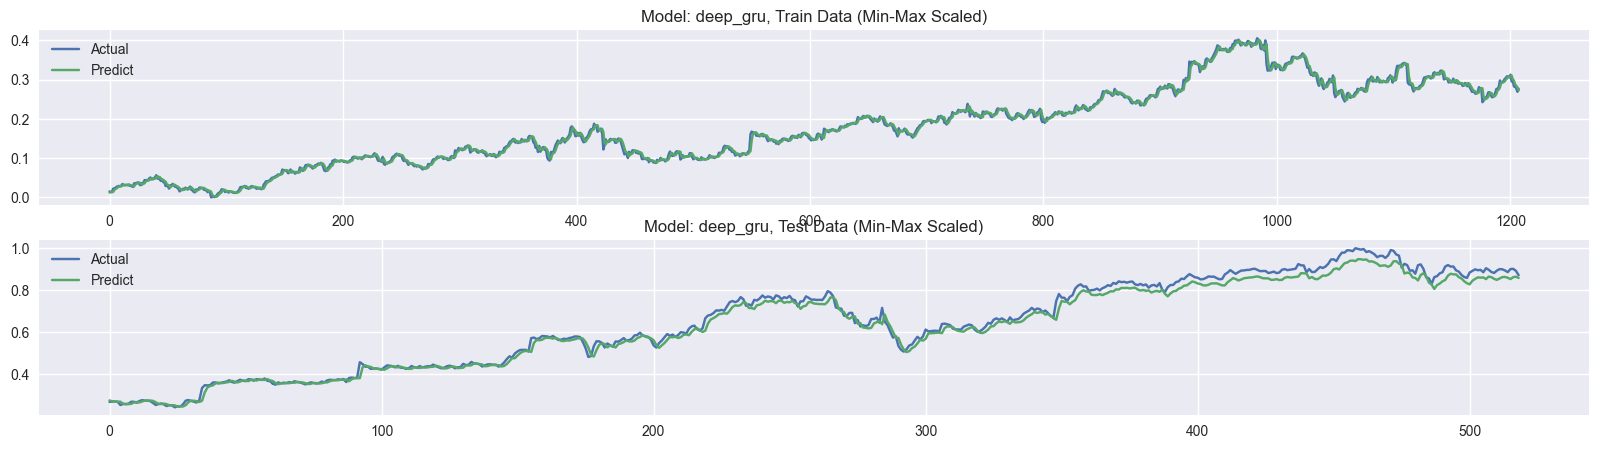

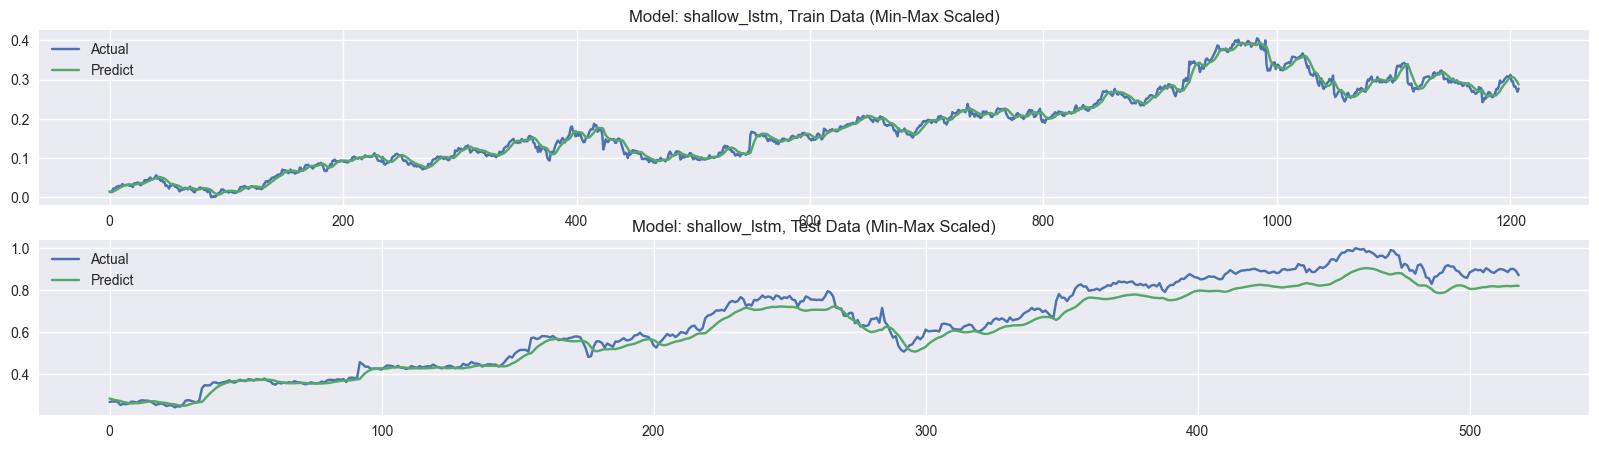

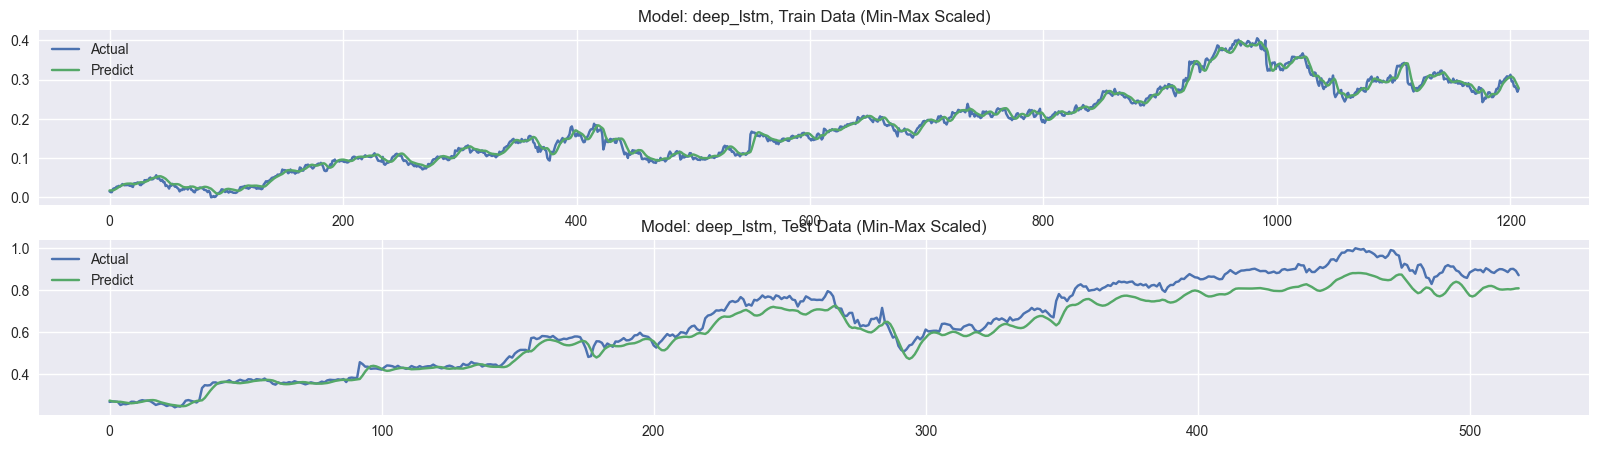

In [63]:
for i, model in enumerate(models_list):
    plt.figure(figsize=(20,5))

    plt.subplot(2,1,1)
    plt.title(f"Model: {model.name}, Train Data (Min-Max Scaled)")
    plt.plot(y_train, label='Actual')
    plt.plot(model.y_train_hat, label='Predict')
    plt.legend()

    plt.subplot(2,1,2)
    plt.title(f"Model: {model.name}, Test Data (Min-Max Scaled)")
    plt.plot(y_test, label='Actual')
    plt.plot(model.y_test_hat, label='Predict')
    plt.legend()

    plt.show()

# Model Exploraiton

In [64]:
CACHE_MODELS_IMG_DIR_NAME = 'models_arch' 
os.makedirs(CACHE_MODELS_IMG_DIR_NAME, exist_ok=True)

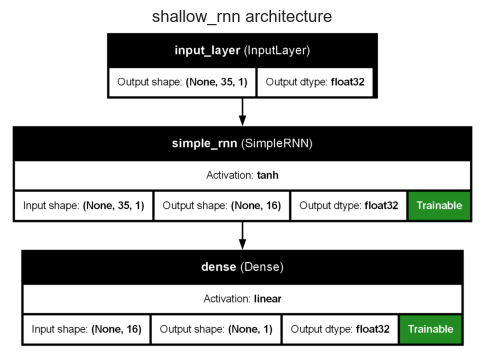

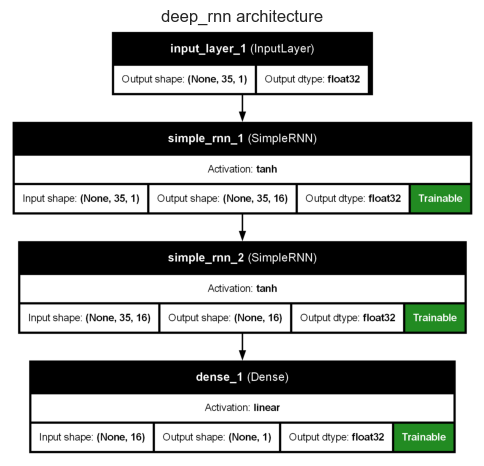

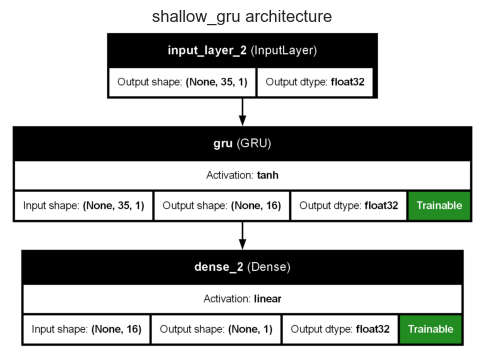

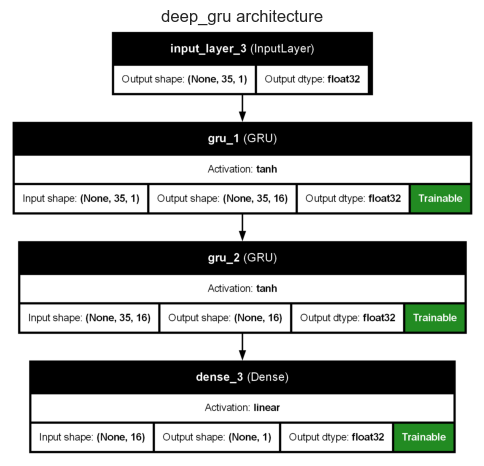

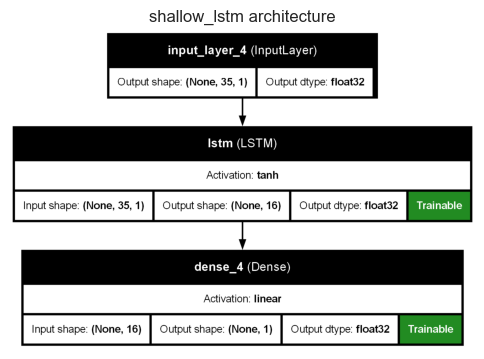

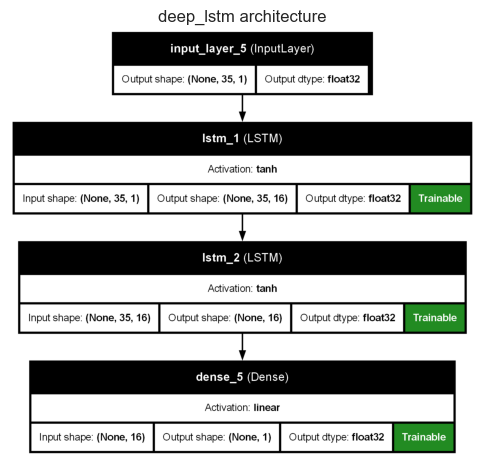

In [65]:
for model in models_list:
    if isinstance(model.model, tf.keras.Model):        
        keras_model = model.model

        img_path = os.path.join(CACHE_MODELS_IMG_DIR_NAME,f'{model.name}.png')

        plot_model(
            keras_model,
            to_file= img_path,          
            show_shapes=True,    
            dpi =200,        
            show_layer_names=True,        
            expand_nested=True,
            show_layer_activations=True,
            show_trainable=True,
            show_dtype=True,
        )       

        img = mpimg.imread(img_path)
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{model.name} architecture")
        plt.show()           


# Caching

evaluation

In [66]:
evaluation_dataset.to_csv("eval_dataset.csv")

y vs y hat csv

In [67]:
CAHCE_Y_VS_Y_HAT_DIR_NAME = 'models_predictions' 
os.makedirs(CAHCE_Y_VS_Y_HAT_DIR_NAME, exist_ok=True)

In [68]:
for model in models_list:
    pad_width = len(y_train) - len(y_test)

    pd.DataFrame(
        {
            'actual Y train' : y_train,
            'predict Y train' : model.y_train_hat.flatten(),
            'actual Y test' : np.pad(y_test, (0, pad_width), mode='constant', constant_values=-1),
            'predict Y test' : np.pad(model.y_test_hat.flatten(), (0, pad_width), mode='constant', constant_values=-1),
        }
    ).to_csv(f"{CAHCE_Y_VS_Y_HAT_DIR_NAME}/{model.name}.csv")

encoders & scalers

In [69]:
CACHE_ENCODE_SCALE_DIR_NAME = 'encoders_scalers' 
os.makedirs(CACHE_ENCODE_SCALE_DIR_NAME, exist_ok=True)

In [70]:
save_obj( min_max_scaler, f"{CACHE_ENCODE_SCALE_DIR_NAME}/min-max.pickle" )